# Some preliminary investigation of mapped rat genes

make manhattan plots for rat traits

**TODO**
* make font easier to read, maybe make chromosomes unrotated but in more condensed font
* decide on scales

* see if qmplot makes nicer version. 

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random

from IPython.display import display

# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set(font_scale=1.4)
sns.set_style('white')

sns.set_style("ticks", {"xtick.major.size": 15, "ytick.major.size": 15})
plt.rcParams['svg.fonttype'] = 'none'

import sys

# % matplotlib inline

In [5]:
DATADIR = "/cellar/users/snwright/Data/rat/data/"
OUTDIR = "/cellar/users/snwright/Data/Transfer/rat/UpdatedFigures/"

# SNP level

In [6]:

rat_stats=pd.read_csv(DATADIR + 'allChr_physiological_bmi_wo_tail.assoc.txt',
                      sep='\t',names=['Chr','SNP','bp','A1','A2','Freq','b','se','p'])
rat_stats.index=rat_stats['SNP']
rat_stats.head()

,Chr,SNP,bp,A1,A2,Freq,b,se,p
SNP,,,,,,,,,
chr10:142747,10,chr10:142747,142747,T,C,0.887157,-0.061013,0.033174,0.065889
chr10:143014,10,chr10:143014,143014,T,C,0.887157,-0.061013,0.033174,0.065889
chr10:143363,10,chr10:143363,143363,T,C,0.887157,-0.061013,0.033174,0.065889
chr10:143699,10,chr10:143699,143699,G,C,0.887294,-0.061025,0.033182,0.065899
chr10:143715,10,chr10:143715,143715,C,T,0.887294,-0.061025,0.033182,0.065899


In [12]:
rat_stats.sort_values('p').head(5)

,Chr,SNP,bp,A1,A2,Freq,b,se,p
SNP,,,,,,,,,
chr1:281788173,1,chr1:281788173,281788173,G,C,0.427729,-0.140088,0.020374,6.168170e-12
chr1:281756885,1,chr1:281756885,281756885,C,T,0.422587,-0.138345,0.020192,7.308500e-12
chr1:281758596,1,chr1:281758596,281758596,G,A,0.423009,-0.138230,0.020204,7.828660e-12
chr1:281742867,1,chr1:281742867,281742867,G,A,0.423050,-0.138145,0.020204,8.055750e-12
chr1:281747981,1,chr1:281747981,281747981,G,C,0.423063,-0.138108,0.020204,8.161730e-12


In [13]:
rat_stats.loc["chr18:61744577"]

Chr                 18
SNP     chr18:61744577
bp            61744577
A1                   T
A2                   C
Freq          0.613713
b             0.016431
se            0.020515
p              0.42317
Name: chr18:61744577, dtype: object

In [8]:
human_stats = pd.read_csv("~/Data/rat/data/GIANT_genomics/BMI/bmi.giant-ukbb.meta-analysis.combined.23May2018.txt.gz", sep="\s+")

In [9]:
human_stats = human_stats.dropna(subset=["CHR", "POS"])

# Make some manhattan plots

In [14]:
import sys
#sys.path.append('/Users/brinrosenthal/Google Drive/UCSD/cluster_code/assocplots')
from assocplots import manhattan
from assocplots import qqplot


In [11]:
rat_stats.head()

,Chr,SNP,bp,A1,A2,Freq,b,se,p
SNP,,,,,,,,,
chr10:142747,10,chr10:142747,142747,T,C,0.887157,-0.061013,0.033174,0.065889
chr10:143014,10,chr10:143014,143014,T,C,0.887157,-0.061013,0.033174,0.065889
chr10:143363,10,chr10:143363,143363,T,C,0.887157,-0.061013,0.033174,0.065889
chr10:143699,10,chr10:143699,143699,G,C,0.887294,-0.061025,0.033182,0.065899
chr10:143715,10,chr10:143715,143715,C,T,0.887294,-0.061025,0.033182,0.065899


In [16]:
human_stats.describe()

,CHR,POS,Freq_Tested_Allele,BETA,SE,P,N,INFO
count,2.738025e+07,2.738025e+07,2.738025e+07,2.738025e+07,2.738025e+07,2.738025e+07,2.738025e+07,2.735824e+07
mean,8.631817e+00,7.899083e+07,4.214980e-01,1.031143e-04,3.745263e-02,4.481125e-01,5.052238e+05,8.609404e-01
std,5.773689e+00,5.610100e+07,4.565328e-01,5.341663e-02,3.307152e-02,3.037933e-01,6.641069e+04,1.414008e-01
min,1.000000e+00,5.600000e+01,0.000000e+00,-9.010000e-01,1.600000e-03,0.000000e+00,1.010110e+05,3.000000e-01
25%,4.000000e+00,3.300897e+07,7.000000e-04,-1.510000e-02,6.900000e-03,1.718000e-01,4.846800e+05,7.956780e-01
50%,8.000000e+00,6.972904e+07,1.082000e-01,0.000000e+00,2.940000e-02,4.306000e-01,4.846800e+05,8.999540e-01
75%,1.300000e+01,1.147232e+08,9.972000e-01,1.540000e-02,5.980000e-02,7.115000e-01,4.846800e+05,9.780250e-01
max,2.200000e+01,2.492398e+08,9.999000e-01,6.941000e-01,1.788000e-01,1.000000e+00,8.068340e+05,1.000000e+00


In [39]:
human_stats[human_stats.POS.isna()]

,CHR,POS,SNP,Tested_Allele,Other_Allele,Freq_Tested_Allele,BETA,SE,P,N,INFO


In [17]:
import numpy as np

import numpy as np
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import re

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

def manhattan(p1, pos1, chr1, label1,
               p2=None, pos2=None, chr2=None, label2=None,
               plot_type='single',
               chrs_plot=None, chrs_names=None,
               cut = 2,
               colors = ['k', '0.5'],
               title='Title',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               top1 = 0,
               top2 = 0,
               lines = [10, 15],
               lines_colors = ['g', 'r'],
               lines_styles = ['-', '--'],
               lines_widths = [1,1],
               zoom = None,
               scaling = '-log10', 
              plot_grid_lines=True,
              **kwargs):
    '''
    Static Manhattan plot
    :param p1: p-values for the top panel
    :param pos1: positions
    :param chr1: chromosomes numbers
    :param label1: label
    :param p2: p-values for the bottom panel
    :param pos2: positions
    :param chr2: chromosomes numbers
    :param label2: label
    :param type: Can be 'single', 'double' or 'inverted'
    :param chrs_plot: list of chromosomes that should be plotted. If empty [] all chromosomes will be plotted
    :param cut: lower cut (default 2)
    :param colors: sequence of colors (default: black/gray)
    :param title: defines the title of the plot
    :param xlabel: defines the xlabel of the plot
    :param ylabel: defines the ylabel of the plot
    :param top: Defines the upper limit of the plot. If 0, it is detected automatically.
    :param lines: Horizontal lines to plot.
    :param lines_colors: Colors for the horizontal lines.
    :param lines_styles: Styles for the horizontal lines.
    :param lines_widths: Widths for the horizontal lines.
    :param zoom: [chromosome, position, range] Zooms into a region.
    :param scaling: '-log10' or 'none' (default -log10)
    :param plot_grid_lines: Should chromosome dividers be plotted? (default True)
    :return:
    '''

    # Setting things up
    shift=np.array([0.0])
    plt.clf()

    # If chrs_plot is empty, we need to generate a list of chromosomes
    if chrs_plot is None:
        chrs_list = np.unique(chr1)
        if isinstance(chrs_list[0], str):
            chrs_list = sorted_nicely(chrs_list)
        else:
            chrs_list.sort()
    else:
        chrs_list = chrs_plot


    # If chrs_names is empty, we need to generate a list of names for chromosomes
    if chrs_names is None:
        chrs_names = [str(chrs_list[i]) for i in range(len(chrs_list))]

    plot_positions = False
    if len(chrs_list) == 1:
        plot_positions = True


    for ii, i in enumerate(chrs_list):
        if plot_type != 'single':
            ax1 = plt.subplot(2,1,1)
        else:
            plt.subplot(1,1,1)
        # print(i)
        filt = np.where(chr1==i)[0]
        x = shift[-1]+pos1[filt]
        if scaling=='-log10':
            y = -np.log10(p1[filt])
        elif scaling=='none':
            y = p1[filt]
        else:
            raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
        plt.plot(x[y>cut], y[y>cut], '.', color=colors[ii % len(colors)], **kwargs)
        shift_f = np.max(x)

        if zoom is not None:
            if zoom[0] == i:
                zoom_shift = zoom[1] + shift[-1]

        if plot_type != 'single':
            plt.subplot(2,1,2)#, sharex=ax1)
            filt = np.where(chr2==i)[0]
            x = shift[-1]+pos2[filt]
            if scaling=='-log10':
                y = -np.log10(p2[filt])
            elif scaling=='none':
                y = p2[filt]
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
            plt.plot(x[y>cut], y[y>cut], '.', color=colors[ii % len(colors)])
            shift_m = np.max(x)
        else:
            shift_m = 0

        shift = np.append(shift, np.max([shift_f, shift_m]))

        if plot_type != 'single':
            plt.subplot(2,1,1)
        else:
            plt.subplot(1,1,1)
        if plot_grid_lines:
            plt.plot([shift[-1], shift[-1]], [0, 1000], '-', lw=0.5, color='lightgray', **kwargs)
            plt.xlim([0, shift[-1]])

            if plot_type != 'single':
                plt.subplot(2,1,2)
                plt.plot([shift[-1], shift[-1]], [0, 1000], '-', lw=0.5, color='lightgray', zorder=0)
        plt.xlim([0, shift[-1]])
        # print(shift)

    # Defining top boundary of a plot
    if top1 == 0:
        if plot_type != 'single':
            if scaling == '-log10':
                top1 = np.ceil(np.max([np.max(-np.log10(p1)), np.max(-np.log10(p2))]))
            elif scaling == 'none':
                top1 = np.ceil(np.max([np.max(p1), np.max(p2)]))
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
        else:
            if scaling == '-log10':
                top1 = np.ceil(np.max(-np.log10(p1)))
            elif scaling == 'none':
                top1 = np.ceil(np.max(p1))
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')


    if top2 == 0:
        if plot_type != 'single':
            top2 = top1

    # Setting up the position of labels:
    shift_label = shift[-1]
    shift = (shift[1:]+shift[:-1])/2.
    labels = chrs_names

    # Plotting horizontal lines
    for i, y in enumerate(lines):
        if plot_type != 'single':
            plt.subplot(2,1,1)
            plt.axhline(y=y, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])
            plt.subplot(2,1,2)
            plt.axhline(y=y, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])
        else:
            plt.subplot(1,1,1)
            plt.axhline(y=y, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])

    if plot_type != 'single':
        plt.subplot(2,1,1)
        if not plot_positions:
            plt.xticks(shift, labels)
        plt.ylim([cut+0.05, top1])
    else:
        plt.subplot(1,1,1)
        plt.ylim([cut, top1])
    plt.title(title)
    if plot_type != 'single':
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        if not plot_positions:
            plt.xticks(shift)
    else:
        if not plot_positions:
            plt.xticks(shift, labels)

    plt.text(shift_label*0.95,top1*0.95,label1,#bbox=dict(boxstyle="round", fc="1.0"),
            verticalalignment='top', horizontalalignment='right')

    if plot_type != 'single':
        plt.subplot(2,1,2)
        plt.ylim([cut, top2])
        if plot_type == 'inverted':
            plt.gca().invert_yaxis()
        if not plot_positions:
            plt.xticks(shift, labels)
        if plot_type == 'inverted':
            plt.text(shift_label*0.95,top2*0.95,label2,#bbox=dict(boxstyle="round", fc="1.0"),
                verticalalignment='bottom', horizontalalignment='right')
        else:
            plt.text(shift_label*0.95,top2*0.95,label2,#bbox=dict(boxstyle="round", fc="1.0"),
                verticalalignment='top', horizontalalignment='right')
        plt.ylabel(ylabel)
        plt.gca().yaxis.set_label_coords(-0.065,1.)
        plt.xlabel(xlabel)
        # plt.tight_layout(hspace=0.001)
        plt.subplots_adjust(hspace=0.00)
    else:
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)

    if zoom is not None:
        if plot_type != 'single':
            plt.subplot(2,1,1)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])
            plt.subplot(2,1,2)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])
        else:
            plt.subplot(1,1,1)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])

    return 0

In [18]:
-1 * np.log10(5e-8)

7.301029995663981

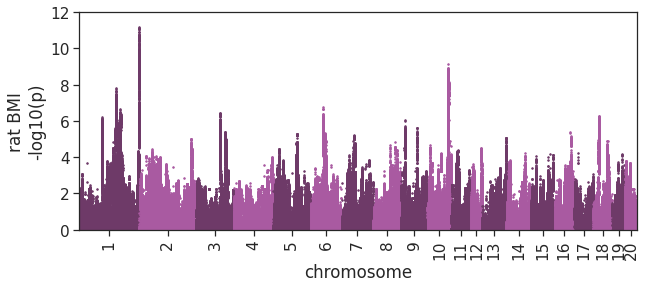

In [24]:
plt.figure(figsize=(10,4))
manhattan(p1=rat_stats['p'],pos1=rat_stats['bp'],chr1=rat_stats['Chr'],label1='',
                    plot_type='single',cut=0,lines=[],lines_colors=['#E81700'], colors=['#6E3A68', '#A95AA1'],
                    lines_widths = [2], lines_styles = ["--"],
                   top1=12, markersize=3, plot_grid_lines=False)
plt.title('')
plt.xticks(rotation='vertical')
plt.ylabel('rat BMI\n-log10(p)')
plt.savefig(OUTDIR + 'rat_BMI_manhattan.svg',bbox_inches='tight')
plt.savefig(OUTDIR + 'rat_BMI_manhattan_200dpi.png',dpi=200,bbox_inches='tight')
plt.savefig(OUTDIR + 'rat_BMI_manhattan_500dpi.png',dpi=500,bbox_inches='tight')

Text(0, 0.5, 'rat BMI\n-log10(p)')

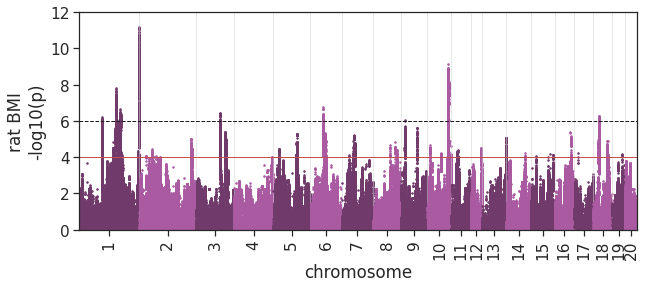

In [20]:
plt.figure(figsize=(10,4))
manhattan(p1=rat_stats['p'],pos1=rat_stats['bp'],chr1=rat_stats['Chr'],label1='',
                    plot_type='single',cut=0,lines=[4,6],lines_colors=['r','k'], colors=['#703B6B', '#A95AA1'], 
                   top1=12, markersize=3)
plt.title('')
plt.xticks(rotation='vertical')
plt.ylabel('rat BMI\n-log10(p)')


Text(0, 0.5, 'rat BMI\n-log10(p)')

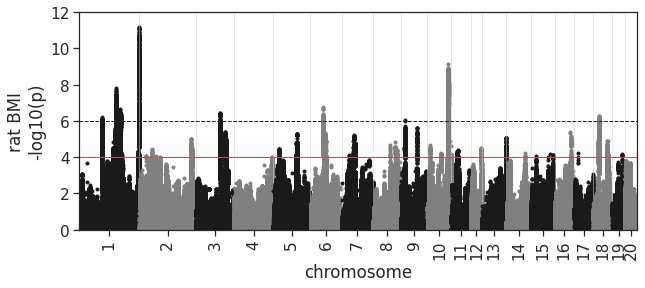

In [35]:
plt.figure(figsize=(10,4))
manhattan(p1=rat_stats['p'],pos1=rat_stats['bp'],chr1=rat_stats['Chr'],label1='',
                    plot_type='single',cut=0,lines=[4,6],lines_colors=['r','k'], 
                   top1=12)
plt.title('')
plt.xticks(rotation='vertical')
plt.ylabel('rat BMI\n-log10(p)')
#plt.savefig('../figures/rat_BMI_manhattan.png',dpi=300,bbox_inches='tight')

/cellar/users/snwright/anaconda3/envs/netcoloc/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


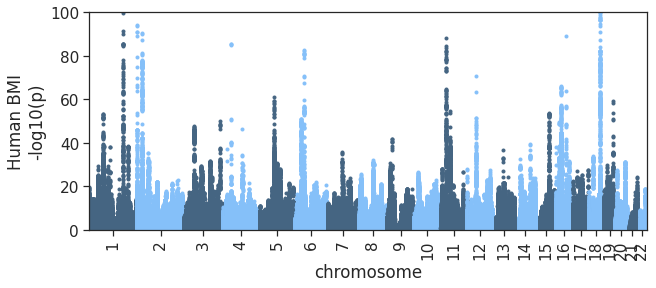

In [25]:
plt.figure(figsize=(10,4))
manhattan(p1=human_stats['P'],pos1=human_stats['POS'].astype(int),chr1=human_stats['CHR'].astype(int),label1='',
                    plot_type='single',cut=0,lines=[],lines_colors=['#E81700'], 
          colors = ["#456582", "#85C0F9"], lines_widths=[2], lines_styles=["--"],
                   top1 =100, plot_grid_lines=False)
plt.title('')
plt.xticks(rotation='vertical')
plt.ylabel('Human BMI\n-log10(p)')
plt.savefig(OUTDIR + 'human_BMI_manhattan_500dpi.png',dpi=500,bbox_inches='tight')
plt.savefig(OUTDIR + 'human_BMI_manhattan_200dpi.png',dpi=200,bbox_inches='tight')
plt.savefig(OUTDIR + 'human_BMI_manhattan_500dpi.svg',bbox_inches='tight')

/cellar/users/snwright/anaconda3/envs/netcoloc/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cellar/users/snwright/anaconda3/envs/netcoloc/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Axis limits cannot be NaN or Inf

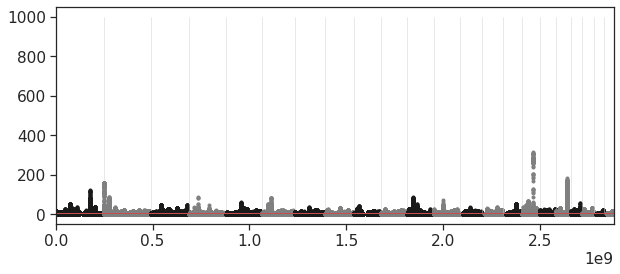

In [37]:
plt.figure(figsize=(10,4))
manhattan(p1=human_stats['P'],pos1=human_stats['POS'].astype(int),chr1=human_stats['CHR'].astype(int),label1='',
                    plot_type='single',cut=0,lines=[8],lines_colors=['r'])
plt.title('')
plt.xticks(rotation='horizontal',)
plt.ylabel('Human BMI\n-log10(p)')
#plt.savefig('../figures/rat_BMI_manhattan.png',dpi=300,bbox_inches='tight')

## Alternative QMPlot

In [31]:
from qmplot import manhattanplot